####  $H=\begin{pmatrix}1 & 0 &0 &0 \\ 0 &0&-1&0 \\0&-1&0&0\\0&0&0&1 \end{pmatrix} =0.5 I \otimes I + 0.5 Z \otimes Z -0.5 X \otimes X -0.5 Y \otimes Y$ 

In [1]:
from qiskit import QuantumCircuit,execute,Aer
import numpy as np
import cmath
from math import pi
from random import uniform

In [2]:
def vqe_ansatz(theta):
    # Create Quantum Circuit
    ansatz=QuantumCircuit(2,2)
    
    # Apply Ry gate
    ansatz.h(0)    
    ansatz.cx(0,1)
    ansatz.rx(theta,0)
    
    # Return Quantum Circuit
    return ansatz

In [3]:
### Select simulator
QC_simulator = Aer.get_backend('qasm_simulator')

# Define number of measurments shots
sample_shots=10000

def expval(paras):
    
    vqe_ans=0.5

    ###### ZZ 
    # call ansatz 
    vqe=vqe_ansatz(paras)    
    # measure in ZZ-basis
    vqe.measure([0,1],[0,1])
    # Compile and execute
    job_qasm = execute(vqe, QC_simulator,shots=sample_shots)
    result_sim = job_qasm.result().get_counts()    

    # Calculate expectation
    P_even=result_sim.get('00',0)+result_sim.get('11',0)
    P_odd=result_sim.get('10',0)+result_sim.get('01',0)
    temp=(P_even-P_odd)/sample_shots
    vqe_ans+=temp*0.5
    
    
    
    ####### XX
    # call ansatz 
    vqe=vqe_ansatz(paras)    
    vqe.h([0,1])
    # measure in XX-basis
    vqe.measure([0,1],[0,1])
    # Compile and execute
    job_qasm = execute(vqe, QC_simulator,shots=sample_shots)
    result_sim = job_qasm.result().get_counts()    

    # Calculate expectation
    P_even=result_sim.get('00',0)+result_sim.get('11',0)
    P_odd=result_sim.get('10',0)+result_sim.get('01',0)
    temp=(P_even-P_odd)/sample_shots
    vqe_ans+=temp*(-0.5)
    


    ####### YY
    # call ansatz 
    vqe=vqe_ansatz(paras)    
    vqe.rx(pi/2,0)
    vqe.rx(pi/2,1)
    # measure in YY-basis
    vqe.measure([0,1],[0,1])
    # Compile and execute
    job_qasm = execute(vqe, QC_simulator,shots=sample_shots)
    result_sim = job_qasm.result().get_counts()    

    # Calculate expectation
    P_even=result_sim.get('00',0)+result_sim.get('11',0)
    P_odd=result_sim.get('10',0)+result_sim.get('01',0)
    temp=(P_even-P_odd)/sample_shots
    vqe_ans+=temp*(-0.5)
    
    

    return vqe_ans

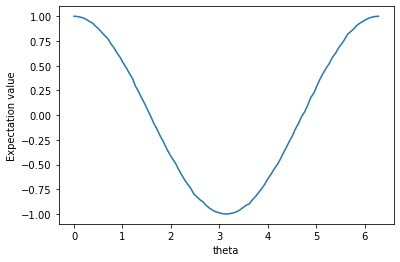

In [4]:
theta_range = np.linspace(0.0, 2 * np.pi, 100)
vqe_result=[expval(params) for params in theta_range]

import matplotlib.pyplot as plt
plt.xlabel('theta')
plt.ylabel('Expectation value')
plt.plot(theta_range, vqe_result)
plt.show()